In [35]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import resample
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout,Flatten,SimpleRNN
import pandas as pd
from ctgan import CTGAN


from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, classification_report, confusion_matrix




In [2]:
# Dataset Path
data_path = 'D:/NCI/Sem 3/Thesis/code_DB/dataset'

In [3]:
#classes
class_labels = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']

# Initialize lists to hold features and labels
X = []
y = []

# Parameters for MFCC
n_mfcc = 13  # Number of MFCC features to extract
max_pad_len = 174  # Ensure all audio files have the same length



In [4]:
def extract_mfcc(file_path):
    """Extract MFCC features from a given audio file."""
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    # Pad or truncate the MFCCs to a fixed length
    pad_width = max_pad_len - mfccs.shape[1]
    if pad_width > 0:
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfccs = mfccs[:, :max_pad_len]
    return mfccs

In [5]:
# Loop through each class folder and extract MFCCs
for i, label in enumerate(class_labels):
    folder_path = os.path.join(data_path, label)
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(folder_path, file_name)
            mfcc = extract_mfcc(file_path)
            X.append(mfcc)
            y.append(i)  # Store the class label as an integer

In [8]:
# Convert to numpy arrays
X_mfcc = np.array(X)
y_mfcc = np.array(y)

In [9]:
# Reshape X to be suitable for LSTM (samples, time steps, features)
X_lstm = X.reshape(X_mfcc.shape[0], X_mfcc.shape[2], X_mfcc.shape[1])  # Reshape to (samples, time_steps, features)

# Convert labels to one-hot encoding
lb = LabelBinarizer()


In [10]:
y_lstm=to_categorical(lb.fit_transform(y_mfcc), num_classes=len(class_labels))

In [21]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy','F1 Score','Precision','Recall'])

In [11]:
X1 = X_mfcc
y1 = y_mfcc

In [12]:
# Reshape X to be suitable for the SVM
X_mfcc = X_mfcc.reshape(X_mfcc.shape[0], -1)  # Flatten the MFCC array

In [13]:
print(f'Extracted {X_mfcc.shape[0]} samples with shape {X_mfcc.shape}')

Extracted 457 samples with shape (457, 2262)


## Simple models with original data

In [14]:
#Split the data into training and test sets
X_mfcc_train, X_mfcc_test, y_mfcc_train, y_mfcc_test = train_test_split(X_mfcc, y_mfcc, test_size=0.2, random_state=42)

## 1. SVM

D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

5-Fold Cross-Validation Accuracy: 0.77
5-Fold Cross-Validation F1_weighted: 0.75
5-Fold Cross-Validation Precision_weighted: 0.73
5-Fold Cross-Validation Recall_weighted: 0.77
                    Model  Accuracy  F1 Score  Precision    Recall
0            SVM (simple)  0.673913  0.663346   0.655543  0.673913
1  Random Forest (simple)  0.782609  0.663346   0.655543  0.673913
2         SVM (5-fold CV)  0.767123  0.748734   0.731613  0.767123
3         SVM (5-fold CV)  0.767123  0.748734   0.731613  0.767123
              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         4
     burping       0.00      0.00      0.00         2
  discomfort       0.25      0.14      0.18         7
      hungry       0.81      0.85      0.83        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.67        92
   macro avg       0.21      0.20      0.20        92
weighted avg       0.66      0.67      0.66        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

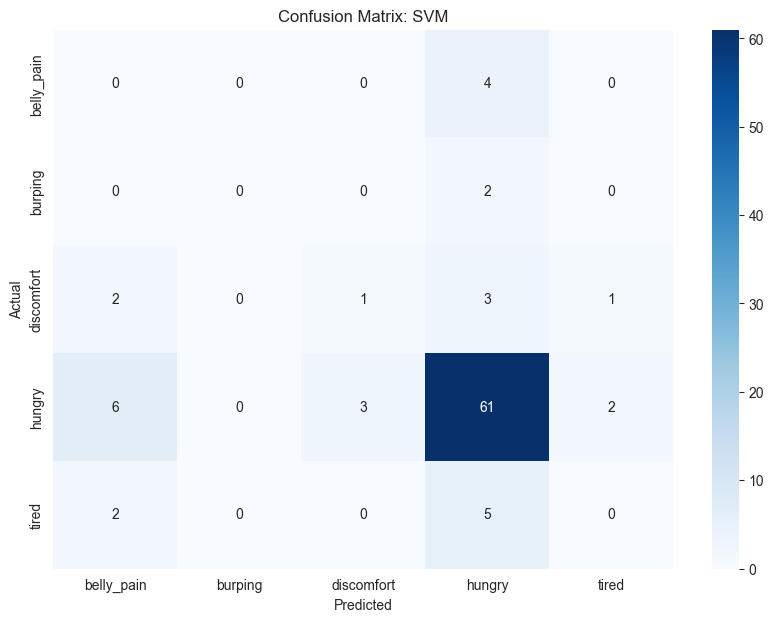

In [37]:

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Define a list of scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted')
}

# Apply 5-fold cross-validation and collect each metric's results
results = {}
for metric_name, metric in scoring_metrics.items():
    scores = cross_val_score(svm_model, X_mfcc_train, y_mfcc_train, cv=5, scoring=metric)
    results[metric_name] = scores.mean()

# Print the average cross-validation results for each metric
for metric_name, score in results.items():
    print(f'5-Fold Cross-Validation {metric_name.capitalize()}: {score:.2f}')

# Add the cross-validation results to the results dataframe
new_row_cv = pd.DataFrame([["SVM (5-fold CV)", results['accuracy'], results['f1_weighted'], 
                            results['precision_weighted'], results['recall_weighted']]],
                          columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
results_df = pd.concat([results_df, new_row_cv], ignore_index=True)
print(results_df)

# Refit the model with the training data for confusion matrix and report
svm_model.fit(X_mfcc_train, y_mfcc_train)
y_pred_svm = svm_model.predict(X_mfcc_test)

# Print classification report
#class_labels = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']  #  class names
print(classification_report(y_mfcc_test, y_pred_svm, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_mfcc_test, y_pred_svm)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: SVM')
plt.show()


In [38]:
results_df

,Model,Accuracy,F1 Score,Precision,Recall
0,SVM (simple),0.673913,0.663346,0.655543,0.673913
1,Random Forest (simple),0.782609,0.663346,0.655543,0.673913
2,SVM (5-fold CV),0.767123,0.748734,0.731613,0.767123
3,SVM (5-fold CV),0.767123,0.748734,0.731613,0.767123


2. Random Forest

In [26]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
# Training the model
rf_model.fit(X_mfcc_train, y_mfcc_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred_rf = rf_model.predict(X_mfcc_test)

In [30]:
accuracy = accuracy_score(y_mfcc_test, y_pred_rf)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 78.26%


In [31]:
new_row = pd.DataFrame([["Random Forest (simple)", accuracy,f1,precision,recall]], columns=['Model', 'Accuracy','F1 Score','Precision','Recall'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy,F1 Score,Precision,Recall
0,SVM (simple),0.673913,0.663346,0.655543,0.673913
1,Random Forest (simple),0.782609,0.663346,0.655543,0.673913


In [32]:
print(classification_report(y_mfcc_test, y_pred_rf, target_names=class_labels))

              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         4
     burping       0.00      0.00      0.00         2
  discomfort       0.00      0.00      0.00         7
      hungry       0.78      1.00      0.88        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.78        92
   macro avg       0.16      0.20      0.18        92
weighted avg       0.61      0.78      0.69        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [33]:
cm = confusion_matrix(y_mfcc_test, y_pred_rf)

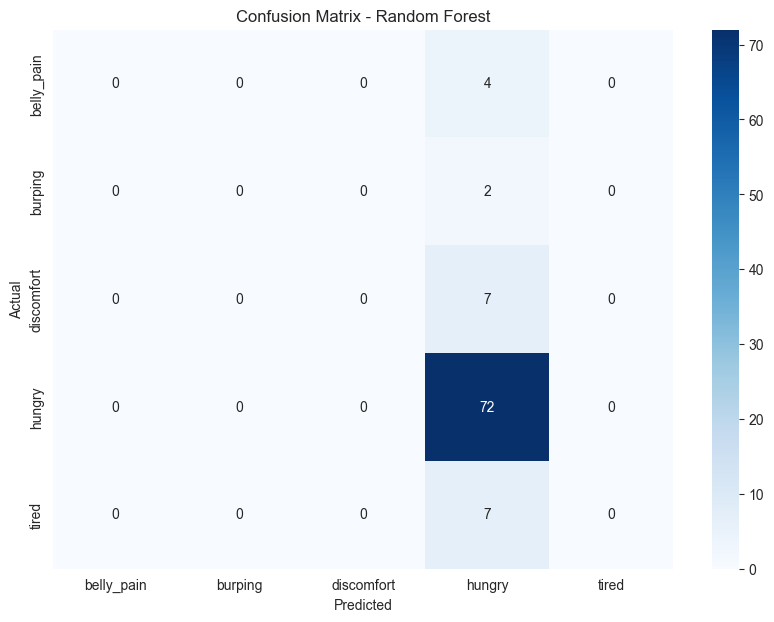

In [34]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [71]:
# Initializing the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

In [72]:
# Training the AdaBoost model on the resampled training data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [73]:
# Making predictions
y_pred_ada = ada_model.predict(X_test)

In [74]:
# Evaluating the AdaBoost model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'AdaBoost Accuracy: {accuracy_ada*100:.2f}%')



AdaBoost Accuracy: 75.00%


In [75]:
new_row = pd.DataFrame([["AdaBoost (simple)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609


In [76]:
# Printing classification report
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada, target_names=class_labels))

AdaBoost Classification Report:
              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         4
     burping       0.00      0.00      0.00         2
  discomfort       0.00      0.00      0.00         7
      hungry       0.78      0.96      0.86        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.75        92
   macro avg       0.16      0.19      0.17        92
weighted avg       0.61      0.75      0.68        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [77]:
cm = confusion_matrix(y_test, y_pred_ada)


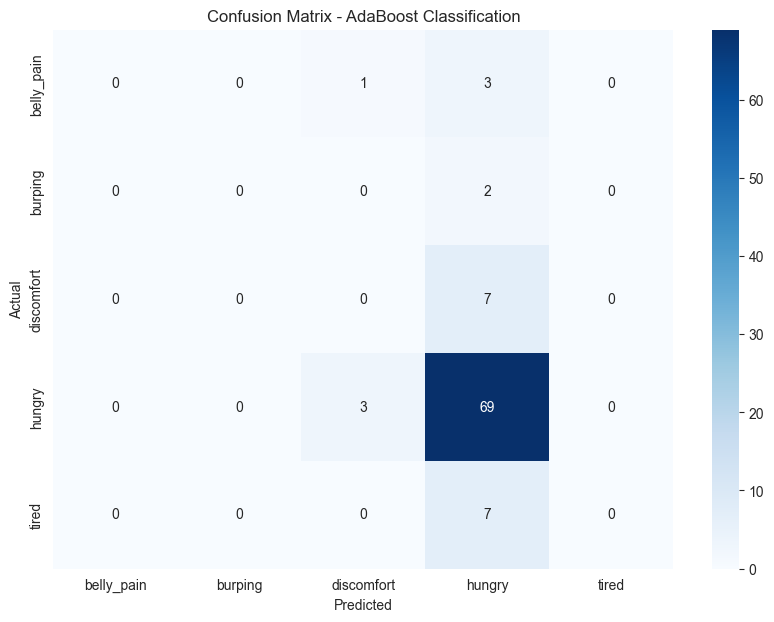

In [78]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost Classification')
plt.show()

In [79]:
# Initializing the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [80]:
# Training the XGBoost model on the resampled training data
xgb_model.fit(X_train, y_train)

D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [81]:
# Making predictions
y_pred_xgb = xgb_model.predict(X_test)

In [82]:
# Evaluating the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb*100:.2f}%')

XGBoost Accuracy: 78.26%


In [83]:
new_row = pd.DataFrame([["XGBoost (simple)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609


In [84]:
# Printing classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=class_labels))

XGBoost Classification Report:
              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         4
     burping       0.00      0.00      0.00         2
  discomfort       0.00      0.00      0.00         7
      hungry       0.78      1.00      0.88        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.78        92
   macro avg       0.16      0.20      0.18        92
weighted avg       0.61      0.78      0.69        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [85]:
cm = confusion_matrix(y_test, y_pred_xgb)


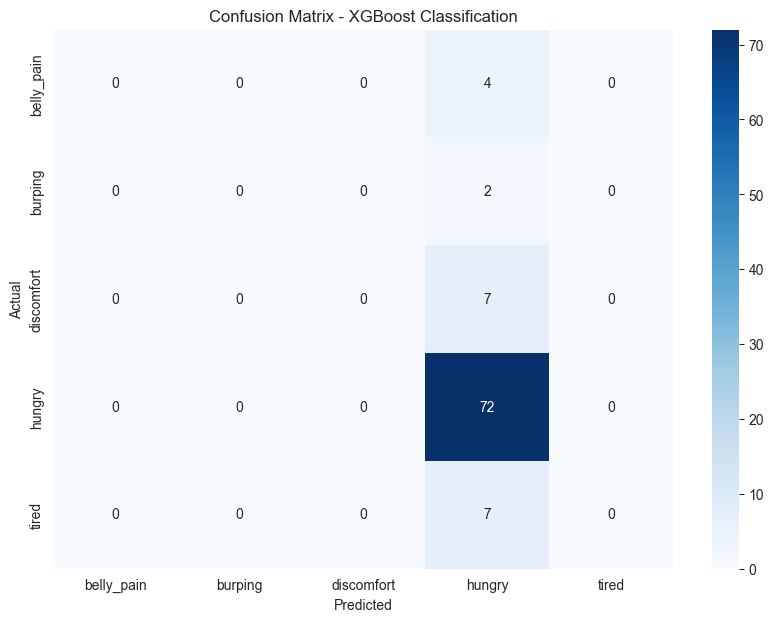

In [86]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classification')
plt.show()

In [87]:
# Initializing the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # 


In [88]:
# Training the KNN model on the resampled data
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [89]:
# Making predictions
y_pred_knn = knn_model.predict(X_test)

In [90]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.17%


In [91]:
new_row = pd.DataFrame([["KNN (simple)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739


In [92]:
# Printing classification report
print(classification_report(y_test, y_pred_knn, target_names=class_labels))


              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         4
     burping       0.00      0.00      0.00         2
  discomfort       0.00      0.00      0.00         7
      hungry       0.78      0.99      0.87        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.77        92
   macro avg       0.16      0.20      0.17        92
weighted avg       0.61      0.77      0.68        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

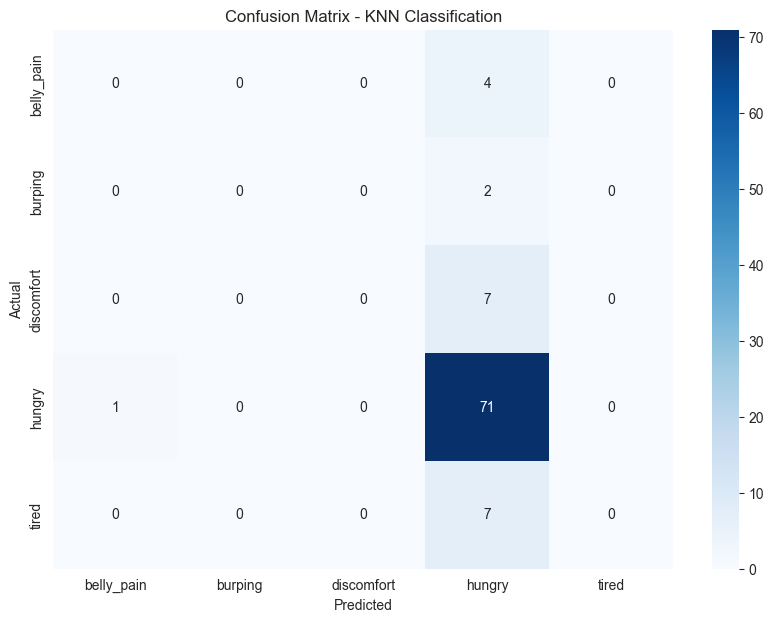

In [93]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classification')
plt.show()

## LSTM

In [103]:
y_lstm

array([[[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.]]], dtype=float32)

In [111]:
 #Split the data into training and test sets
 X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm , y_lstm, test_size=0.2, random_state=42)

In [116]:
# Convert labels to one-hot encoding
y_train_lstm = to_categorical(y_train_lstm, num_classes=len(class_labels))  # Ensure correct shape (None, 5)
y_test_lstm = to_categorical(y_test_lstm, num_classes=len(class_labels))    # Ensure correct shape (None, 5)


In [131]:
# Define LSTM model
LSTM_model = Sequential()

In [132]:
LSTM_model.add(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
LSTM_model.add(Flatten())#(Dropout(0.5))
LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(Dense(len(class_labels), activation='softmax'))  # Output layer




In [133]:
# Compile the model
LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [134]:
# Train the model
LSTM_model.fit(X_train_lstm, y_train_lstm, epochs=3, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/3


ValueError: in user code:

    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5, 5, 5) and (None, 5) are incompatible


In [ ]:
## RNN

In [148]:
X_train_rnn = X_train_lstm.reshape((X_train_lstm.shape[0], 174, 13))  # reshape according to timesteps and features
X_test_rnn = X_test_lstm.reshape((X_test_lstm.shape[0], 174, 13))      # reshape the test set similarly


In [153]:
# Define the model
RNN_model = Sequential()

In [154]:
# Add an RNN layer
RNN_model.add(SimpleRNN(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=False))


In [155]:
# Add Dropout for regularization
RNN_model.add(Dropout(0.5))
# Fully connected Dense layer
RNN_model.add(Dense(64, activation='relu'))
# Output layer with 'len(class_labels)' units (for multi-class classification)
RNN_model.add(Dense(len(class_labels), activation='softmax'))



In [156]:
# Compile the model
RNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [158]:
# Train the model
RNN_model.fit(X_train_rnn, y_train, epochs=1, batch_size=32, validation_data=(X_test_rnn, y_test_lstm))

ValueError: in user code:

    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 5) are incompatible


## Handling Data imbalance with SMOTE

In [159]:
# the number of samples per class before applying SMOTE
print(f"Original class distribution: {Counter(y_train)}")

Original class distribution: Counter({3: 310, 2: 20, 4: 17, 0: 12, 1: 6})


In [160]:
# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [161]:
# the number of samples per class after oversampling
print(f"Class distribution after SMOTE: {Counter(y_train_resampled)}")

Class distribution after SMOTE: Counter({1: 310, 3: 310, 2: 310, 4: 310, 0: 310})


In [162]:
# Initializing the SVM model with SMOTE
svm_model_smote = SVC(kernel='linear')

In [163]:
# Training the SVM model on the resampled data
svm_model_smote.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [164]:
# Making predictions
y_pred_smote = svm_model_smote.predict(X_test)

In [165]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_smote)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 67.39%


In [166]:
new_row = pd.DataFrame([["SVM (SMOTE on training data only)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739
5,SVM (SMOTE on training data only),0.673913


In [167]:
# Printing classification report
print(classification_report(y_test, y_pred_smote, target_names=class_labels))

              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         4
     burping       0.00      0.00      0.00         2
  discomfort       0.25      0.14      0.18         7
      hungry       0.81      0.85      0.83        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.67        92
   macro avg       0.21      0.20      0.20        92
weighted avg       0.66      0.67      0.66        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [47]:
cm = confusion_matrix(y_test, y_pred_smote)

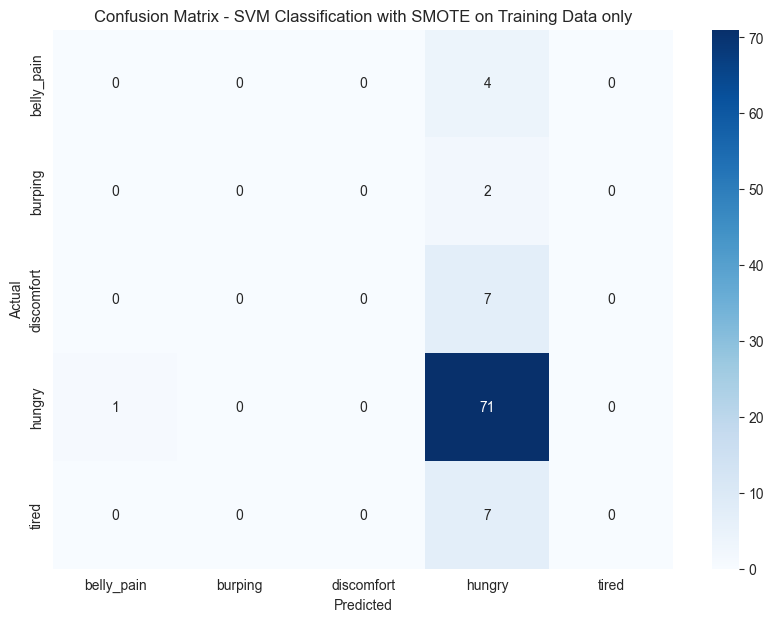

In [168]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Classification with SMOTE on Training Data only')
plt.show()

In [169]:
# Random Forest
rf_model_smote = RandomForestClassifier(n_estimators=10, random_state=42)


In [170]:
# Training the model
rf_model_smote.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(n_estimators=10, random_state=42)

In [171]:
y_pred_smote = rf_model_smote.predict(X_test)


In [172]:
accuracy = accuracy_score(y_test, y_pred_smote)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 73.91%


In [173]:
new_row = pd.DataFrame([["Random Forest (SMOTE on training data only)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739
5,SVM (SMOTE on training data only),0.673913
6,Random Forest (SMOTE on training data only),0.739130


In [174]:
print(classification_report(y_test, y_pred_smote, target_names=class_labels))


              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         4
     burping       0.00      0.00      0.00         2
  discomfort       0.17      0.14      0.15         7
      hungry       0.82      0.93      0.87        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.74        92
   macro avg       0.20      0.21      0.20        92
weighted avg       0.65      0.74      0.69        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

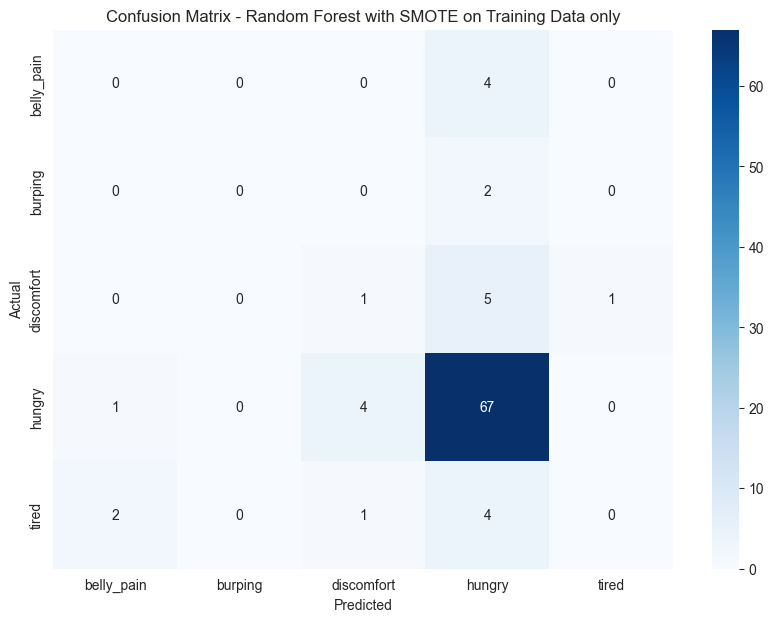

In [175]:
cm = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest with SMOTE on Training Data only')
plt.show()

In [176]:
# Initializing the AdaBoost model
ada_model_smote = AdaBoostClassifier(n_estimators=100, random_state=42)


In [177]:
# Training the AdaBoost model on the resampled training data
ada_model_smote.fit(X_train_resampled, y_train_resampled)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [178]:
# Making predictions
y_pred_ada_smote = ada_model_smote.predict(X_test)


In [179]:
# Evaluating the AdaBoost model
accuracy_ada = accuracy_score(y_test, y_pred_ada_smote)
print(f'AdaBoost Accuracy: {accuracy_ada * 100:.2f}%')



AdaBoost Accuracy: 5.43%


In [180]:
new_row = pd.DataFrame([["AdaBoost (SMOTE on training data only)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739
5,SVM (SMOTE on training data only),0.673913
6,Random Forest (SMOTE on training data only),0.739130
7,AdaBoost (SMOTE on training data only),0.739130


In [181]:
# Printing classification report
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada_smote, target_names=class_labels))


AdaBoost Classification Report:
              precision    recall  f1-score   support

  belly_pain       0.04      0.75      0.08         4
     burping       0.00      0.00      0.00         2
  discomfort       0.12      0.29      0.17         7
      hungry       0.00      0.00      0.00        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.05        92
   macro avg       0.03      0.21      0.05        92
weighted avg       0.01      0.05      0.02        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

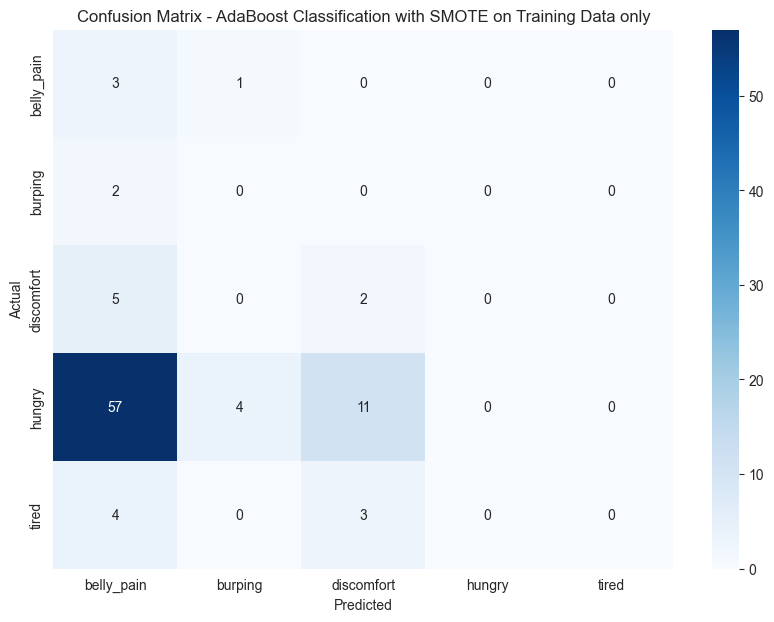

In [182]:
cm = confusion_matrix(y_test, y_pred_ada_smote)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost Classification with SMOTE on Training Data only')
plt.show()

In [183]:
# Initializing the XGBoost model
xgb_model_smote = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [184]:
# Training the XGBoost model on the resampled training data
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [00:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [185]:
# Making predictions
y_pred_xgb_smote = xgb_model_smote.predict(X_test)

In [186]:
# Evaluating the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_smote)
print(f'XGBoost Accuracy: {accuracy_xgb*100:.2f}%')

XGBoost Accuracy: 76.09%


In [187]:
new_row = pd.DataFrame([["XGBoost (SMOTE on training data only)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739
5,SVM (SMOTE on training data only),0.673913
6,Random Forest (SMOTE on training data only),0.739130
7,AdaBoost (SMOTE on training data only),0.739130
8,XGBoost (SMOTE on training data only),0.739130


In [188]:
# Printing classification report
print("XGBoost Classification Report with SMOTE:")
print(classification_report(y_test, y_pred_xgb_smote, target_names=class_labels))

XGBoost Classification Report with SMOTE:
              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         4
     burping       0.00      0.00      0.00         2
  discomfort       0.00      0.00      0.00         7
      hungry       0.78      0.97      0.86        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.76        92
   macro avg       0.16      0.19      0.17        92
weighted avg       0.61      0.76      0.68        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

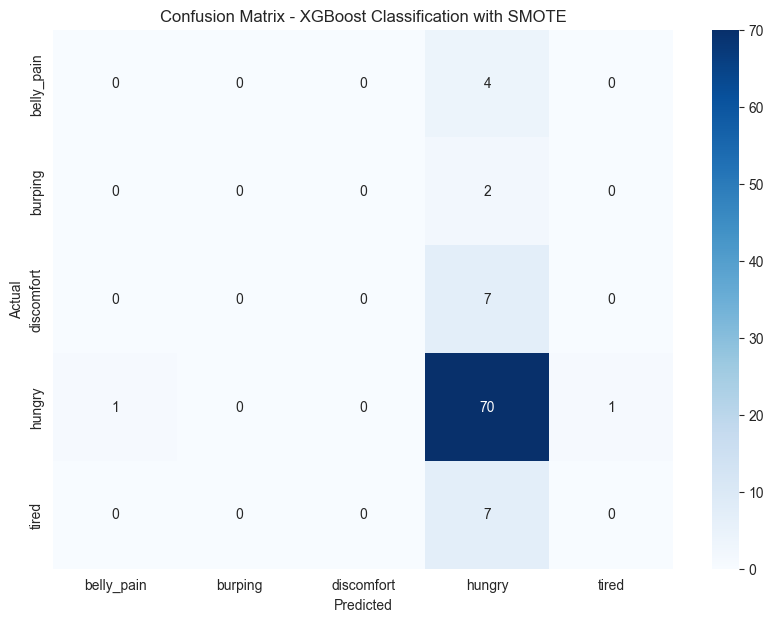

In [189]:
cm = confusion_matrix(y_test, y_pred_xgb_smote)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost Classification with SMOTE')
plt.show()

In [190]:
# Initializing the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # 



In [191]:
# Training the KNN model on the resampled data
knn_model.fit(X_train_resampled, y_train_resampled)



KNeighborsClassifier()

In [192]:
# Making predictions
y_pred_knn = knn_model.predict(X_test)


In [193]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 26.09%


In [194]:
new_row = pd.DataFrame([["KNN (SMOTE on training data only)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739
5,SVM (SMOTE on training data only),0.673913
6,Random Forest (SMOTE on training data only),0.739130
7,AdaBoost (SMOTE on training data only),0.739130
8,XGBoost (SMOTE on training data only),0.739130
9,KNN (SMOTE on training data only),0.260870


In [195]:
# Printing classification report
print(classification_report(y_test, y_pred_knn, target_names=class_labels))

              precision    recall  f1-score   support

  belly_pain       0.05      0.25      0.08         4
     burping       0.11      0.50      0.18         2
  discomfort       0.10      0.29      0.15         7
      hungry       0.78      0.25      0.38        72
       tired       0.10      0.29      0.15         7

    accuracy                           0.26        92
   macro avg       0.23      0.31      0.19        92
weighted avg       0.63      0.26      0.33        92



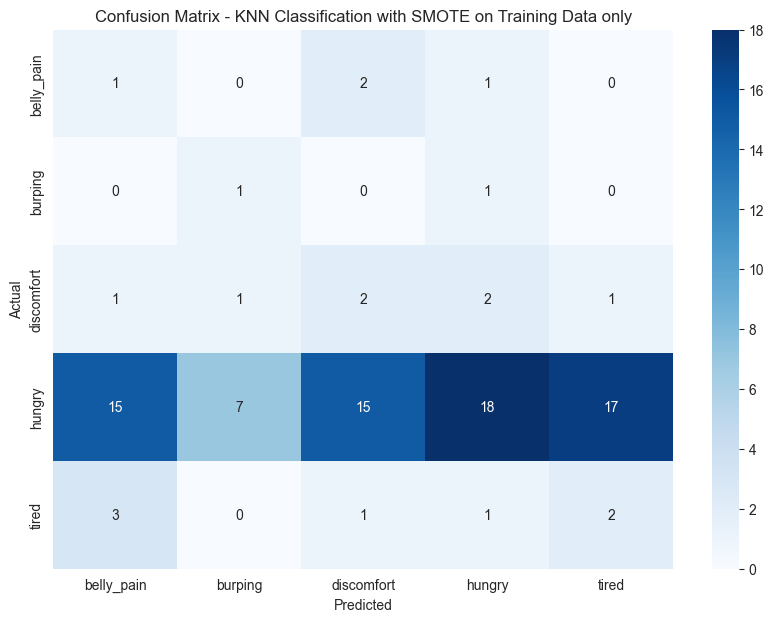

In [197]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classification with SMOTE on Training Data only')
plt.show()

In [198]:
# Initializing Gradient Boosting
gbm_model = GradientBoostingClassifier(random_state=42)


In [199]:
# Training the model
gbm_model.fit(X_train_resampled, y_train_resampled)


GradientBoostingClassifier(random_state=42)

In [200]:
# Making predictions
y_pred_gbm = gbm_model.predict(X_test)


In [201]:
# Evaluating GBM model
accuracy = accuracy_score(y_test, y_pred_gbm)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 76.09%


In [202]:
print(classification_report(y_test, y_pred_gbm, target_names=class_labels))

              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00         4
     burping       0.00      0.00      0.00         2
  discomfort       0.00      0.00      0.00         7
      hungry       0.78      0.97      0.86        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.76        92
   macro avg       0.16      0.19      0.17        92
weighted avg       0.61      0.76      0.68        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [203]:
new_row = pd.DataFrame([["Gradient Boost (SMOTE on training data only)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739
5,SVM (SMOTE on training data only),0.673913
6,Random Forest (SMOTE on training data only),0.739130
7,AdaBoost (SMOTE on training data only),0.739130
8,XGBoost (SMOTE on training data only),0.739130
9,KNN (SMOTE on training data only),0.260870


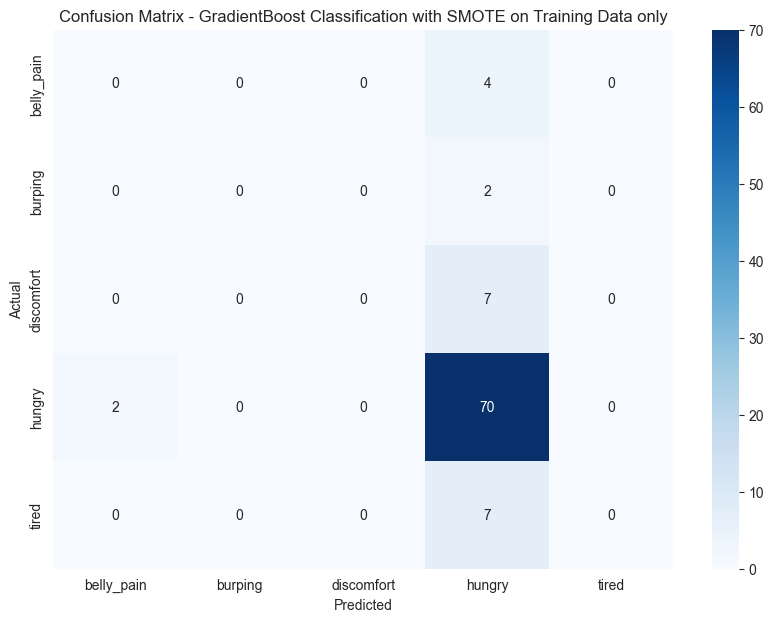

In [204]:
cm = confusion_matrix(y_test, y_pred_gbm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - GradientBoost Classification with SMOTE on Training Data only')
plt.show()

In [206]:
# Initializing MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)


In [207]:
# Train the model
mlp_model.fit(X_train_resampled, y_train_resampled)


MLPClassifier(max_iter=300, random_state=42)

In [208]:

# Making predictions
y_pred_mlp = mlp_model.predict(X_test)


In [209]:
# Evaluating
accuracy = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 66.30%


In [210]:
new_row = pd.DataFrame([["MLP (SMOTE on training data only)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739
5,SVM (SMOTE on training data only),0.673913
6,Random Forest (SMOTE on training data only),0.739130
7,AdaBoost (SMOTE on training data only),0.739130
8,XGBoost (SMOTE on training data only),0.739130
9,KNN (SMOTE on training data only),0.260870


In [211]:
print(classification_report(y_test, y_pred_mlp, target_names=class_labels))

              precision    recall  f1-score   support

  belly_pain       0.11      0.25      0.15         4
     burping       0.00      0.00      0.00         2
  discomfort       0.17      0.14      0.15         7
      hungry       0.80      0.82      0.81        72
       tired       0.00      0.00      0.00         7

    accuracy                           0.66        92
   macro avg       0.22      0.24      0.22        92
weighted avg       0.64      0.66      0.65        92



D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\NCI\Sem 3\Thesis\code_DB\newBabyCryAnalysis\pythonProject\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

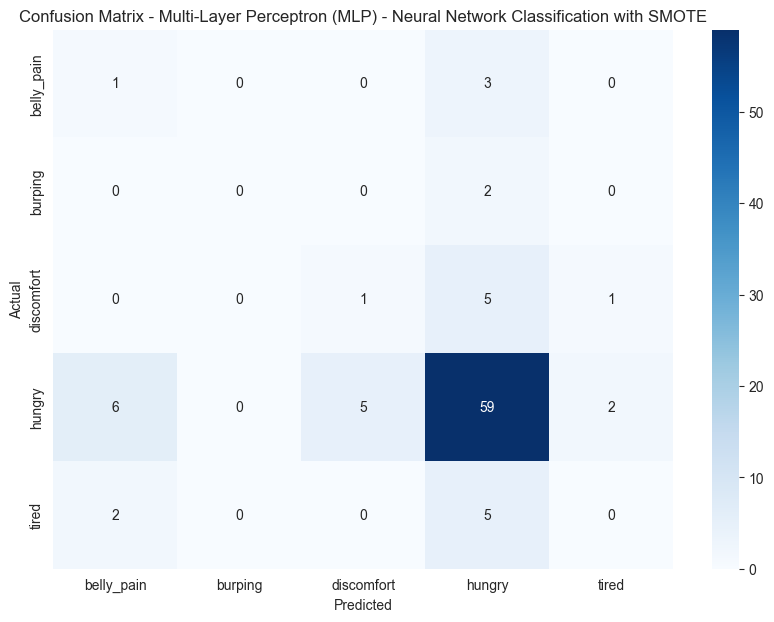

In [212]:
cm = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multi-Layer Perceptron (MLP) - Neural Network Classification with SMOTE')
plt.show()

## Applying SMOTE to training and test dataset separately

In [213]:
# Applying SMOTE to test dataset for oversampling
smote = SMOTE(random_state=42, k_neighbors=1)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

In [214]:
# Initializing the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5) 
# Training the KNN model on the resampled data
knn_model.fit(X_train_resampled, y_train_resampled)


KNeighborsClassifier()

In [215]:
# Making predictions
y_pred_knn_rs = knn_model.predict(X_test_resampled)


In [216]:
# Evaluating the model
accuracy = accuracy_score(y_test_resampled, y_pred_knn_rs)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 34.17%


In [217]:
new_row = pd.DataFrame([["KNN (SMOTE on training and testing data separately)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739
5,SVM (SMOTE on training data only),0.673913
6,Random Forest (SMOTE on training data only),0.739130
7,AdaBoost (SMOTE on training data only),0.739130
8,XGBoost (SMOTE on training data only),0.739130
9,KNN (SMOTE on training data only),0.260870


In [218]:
# Printing classification report
print(classification_report(y_test_resampled, y_pred_knn_rs, target_names=class_labels))

              precision    recall  f1-score   support

  belly_pain       0.17      0.11      0.14        72
     burping       0.64      0.32      0.43        72
  discomfort       0.29      0.44      0.35        72
      hungry       0.26      0.25      0.25        72
       tired       0.44      0.58      0.50        72

    accuracy                           0.34       360
   macro avg       0.36      0.34      0.33       360
weighted avg       0.36      0.34      0.33       360



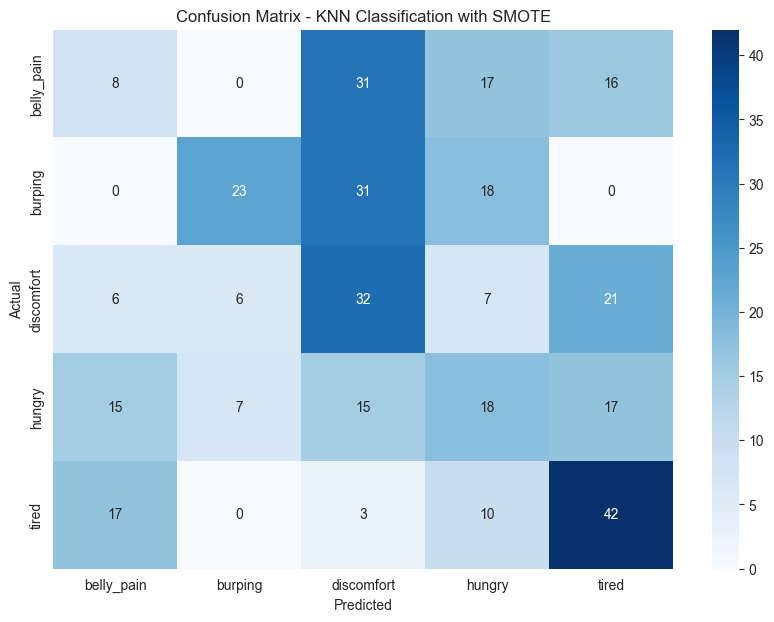

In [219]:

cm = confusion_matrix(y_test_resampled, y_pred_knn_rs)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN Classification with SMOTE')
plt.show()

## Applying SMOTE to entire dataset before train-test split

In [220]:
# Applying SMOTE to entire dataset for oversampling
smote = SMOTE(random_state=42, k_neighbors=1)
X_all_resampled, y_all_resampled = smote.fit_resample(X, y)

In [221]:
# the number of samples per class after oversampling
print(f"Class distribution after SMOTE: {Counter(y_all_resampled)}")

Class distribution after SMOTE: Counter({0: 382, 1: 382, 2: 382, 3: 382, 4: 382})


In [222]:
#Split the data into training and test sets
X_train_all_resampled, X_test_all_resampled, y_train_all_resampled, y_test_all_resampled = train_test_split(X_all_resampled, y_all_resampled, test_size=0.2, random_state=42)


In [223]:
# Initializing the SVM model
svm_model_3 = SVC(kernel='linear')


In [224]:
# Training the SVM model
svm_model_3.fit(X_train_all_resampled, y_train_all_resampled)


SVC(kernel='linear')

In [225]:
# Making predictions
y_pred_svm_3 = svm_model_3.predict(X_test_all_resampled)


In [226]:
# Evaluating the model
accuracy = accuracy_score(y_test_all_resampled, y_pred_svm_3)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 98.17%


In [227]:
new_row = pd.DataFrame([["SVM (SMOTE on entire data, before data split)", accuracy]], columns=['Model', 'Accuracy'])
results_df = pd.concat([results_df, new_row], ignore_index=True)
results_df

,Model,Accuracy
0,SVM (simple),0.673913
1,Random Forest (simple),0.782609
2,AdaBoost (simple),0.782609
3,XGBoost (simple),0.782609
4,KNN (simple),0.771739
5,SVM (SMOTE on training data only),0.673913
6,Random Forest (SMOTE on training data only),0.739130
7,AdaBoost (SMOTE on training data only),0.739130
8,XGBoost (SMOTE on training data only),0.739130
9,KNN (SMOTE on training data only),0.260870


In [228]:
# Printing classification report
print(classification_report(y_test_all_resampled, y_pred_svm_3, target_names=class_labels))


              precision    recall  f1-score   support

  belly_pain       0.95      1.00      0.97        73
     burping       0.99      1.00      0.99        72
  discomfort       0.99      1.00      0.99        80
      hungry       1.00      0.92      0.96        84
       tired       0.99      1.00      0.99        73

    accuracy                           0.98       382
   macro avg       0.98      0.98      0.98       382
weighted avg       0.98      0.98      0.98       382



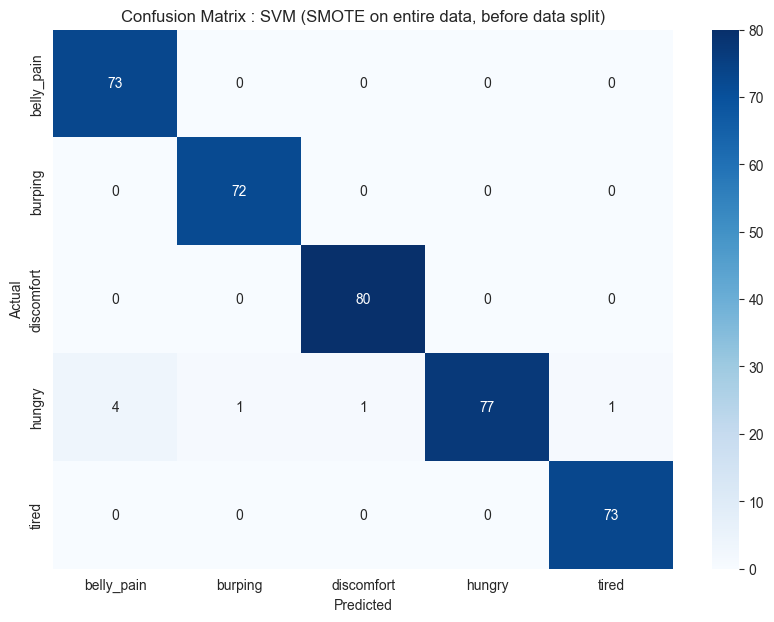

In [230]:
# Confusion Matrix
cm = confusion_matrix(y_test_all_resampled, y_pred_svm_3)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix : SVM (SMOTE on entire data, before data split)')
plt.show()